In [1]:
%env CUBLAS_WORKSPACE_CONFIG=:16:8

env: CUBLAS_WORKSPACE_CONFIG=:16:8


In [2]:
from autoencodix.utils.example_data import (
    EXAMPLE_MULTI_BULK,
    EXAMPLE_MULTI_SC,
    EXAMPLE_PROCESSED_DATA,
)

# EXAMPLE_DATA hold PyTorch Datasets (child with extra info) with metdata for train, test and valid splits
processed_data = EXAMPLE_PROCESSED_DATA
raw_bulk = EXAMPLE_MULTI_BULK
raw_sc = EXAMPLE_MULTI_SC

/home/ewald/Github/autoencodix_package/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
EXAMPLE_PROCESSED_DATA.train.metadata

,cluster,age,size,density,category,random_feature,sample_id
sample_303,Cluster_1,21.194224,4.538300,0.113699,A,-0.657083,sample_303
sample_259,Cluster_1,23.930016,6.864434,0.086318,A,1.280058,sample_259
sample_717,Cluster_4,53.074559,12.812042,1.111816,D,-0.046288,sample_717
sample_127,Cluster_5,53.380117,12.875572,0.525779,C,0.578705,sample_127
sample_576,Cluster_1,33.724569,2.429471,0.038608,B,0.657419,sample_576
...,...,...,...,...,...,...,...
sample_578,Cluster_1,28.165998,6.223125,0.286763,E,0.047880,sample_578
sample_946,Cluster_2,31.830988,4.929979,0.456122,B,0.126054,sample_946
sample_284,Cluster_3,40.607502,6.923138,2.313312,B,-0.288755,sample_284
sample_462,Cluster_1,40.449944,0.831899,0.096780,C,1.070726,sample_462


In [4]:
import autoencodix as acx
from autoencodix.utils.default_config import DefaultConfig

preprocessing


Epoch 1 - Train Loss: 840489.1133
Sub-losses: recon_loss: 840489.1133
Epoch 1 - Valid Loss: 113938.0085
Sub-losses: recon_loss: 113938.0085
Epoch 2 - Train Loss: 769611.0195
Sub-losses: recon_loss: 769611.0195
Epoch 2 - Valid Loss: 102112.4814
Sub-losses: recon_loss: 102112.4814
Epoch 3 - Train Loss: 696815.0156
Sub-losses: recon_loss: 696815.0156
Epoch 3 - Valid Loss: 90086.9753
Sub-losses: recon_loss: 90086.9753
Epoch 4 - Train Loss: 626703.7852
Sub-losses: recon_loss: 626703.7852
Epoch 4 - Valid Loss: 81164.8928
Sub-losses: recon_loss: 81164.8928
Epoch 5 - Train Loss: 571475.1387
Sub-losses: recon_loss: 571475.1387
Epoch 5 - Valid Loss: 74864.5598
Sub-losses: recon_loss: 74864.5598
Epoch 6 - Train Loss: 529779.4375
Sub-losses: recon_loss: 529779.4375
Epoch 6 - Valid Loss: 69795.5925
Sub-losses: recon_loss: 69795.5925
Epoch 7 - Train Loss: 502964.3145
Sub-losses: recon_loss: 502964.3145
Epoch 7 - Valid Loss: 64983.6154
Sub-losses: recon_loss: 64983.6154
Epoch 8 - Train Loss: 477783.7

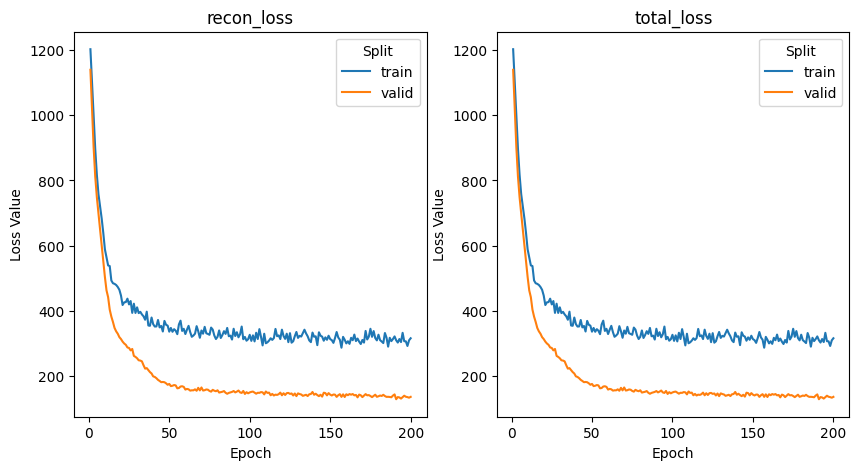

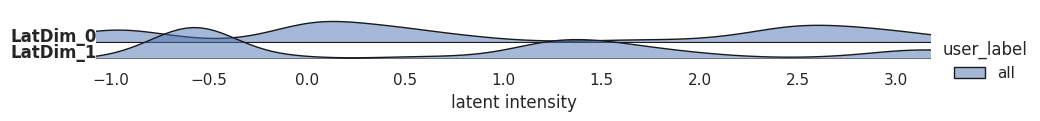

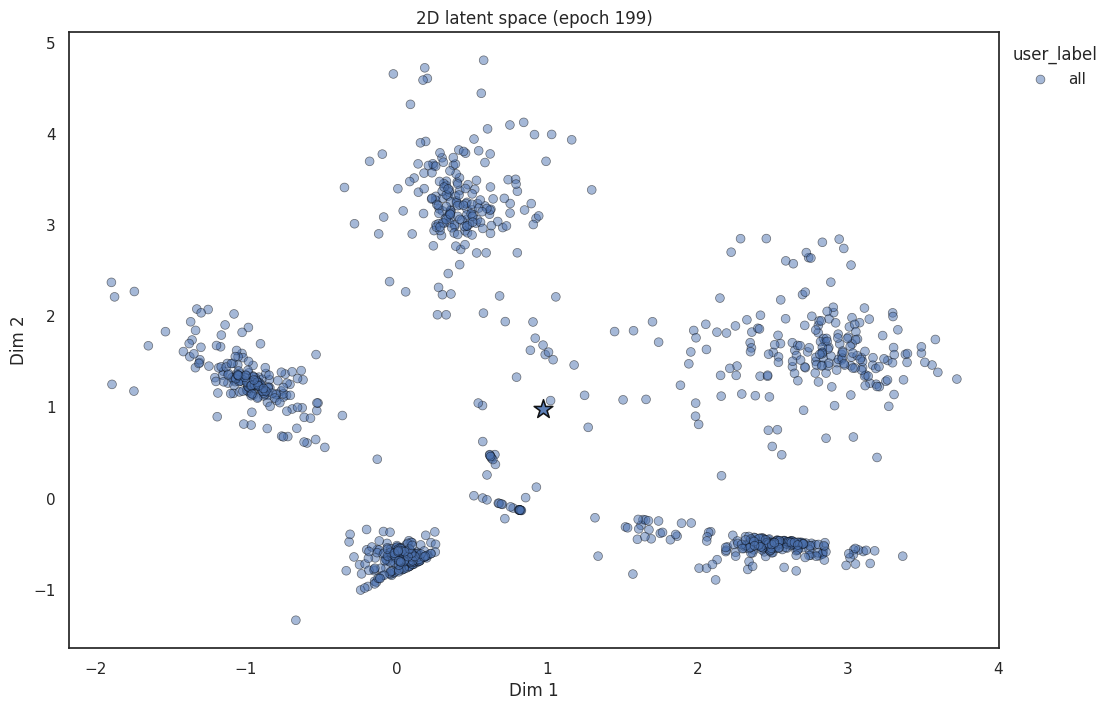

In [5]:
vanillix = acx.Vanillix(config=DefaultConfig(epochs=200, learning_rate=0.005,n_layers=1, latent_dim=2, checkpoint_interval=50), data=processed_data)
vanillix.run()
vanillix.show_result()

In [6]:
## Not needed anymore since in-built in visualizer

# categorical_clusters = ["Cluster_"+str(c) for c in EXAMPLE_PROCESSED_DATA.train.metadata.cluster]
# categorical_clusters

In [7]:
vanillix.result.datasets.train.metadata.index

Index(['sample_303', 'sample_259', 'sample_717', 'sample_127', 'sample_576',
       'sample_960', 'sample_492', 'sample_581', 'sample_359', 'sample_781',
       ...
       'sample_733', 'sample_582', 'sample_337', 'sample_100', 'sample_405',
       'sample_578', 'sample_946', 'sample_284', 'sample_462', 'sample_391'],
      dtype='object', length=699)

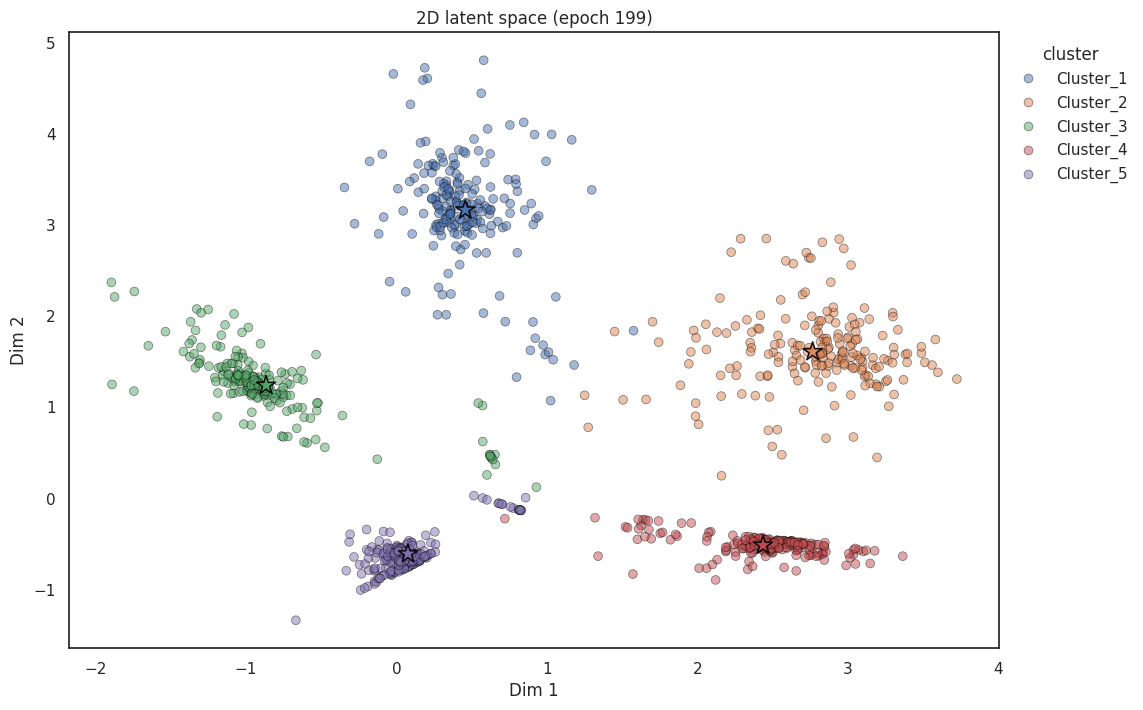

In [8]:
vanillix._visualizer.show_latent_space(result=vanillix.result,plot_type="2D-scatter", param=["cluster"])

## Ontix

In [9]:
import autoencodix as acx
from autoencodix.utils.default_config import DefaultConfig

from autoencodix.utils.example_data import (
    EXAMPLE_PROCESSED_DATA,
)

# EXAMPLE_DATA hold PyTorch Datasets (child with extra info) with metdata for train, test and valid splits
processed_data = EXAMPLE_PROCESSED_DATA


In [10]:

ont_lvl1 = dict()
ont_lvl2 = dict()

ont_lvl1["pwy-1"] = ["sub-pwy-1", "sub-pwy-2"]
ont_lvl1["pwy-2"] = ["sub-pwy-2"]
ont_lvl1["pwy-3"] = ["sub-pwy-1", "sub-pwy-3"]
# first third of feature ids in processed_data.train.feature_ids
ont_lvl2["sub-pwy-1"] = processed_data.train.feature_ids[: int(len(processed_data.train.feature_ids) / 3)]
# second third of feature ids in processed_data.train.feature_ids
ont_lvl2["sub-pwy-2"] = processed_data.train.feature_ids[
	int(len(processed_data.train.feature_ids) / 3) : int(2 * len(processed_data.train.feature_ids) / 3)
]
# last third of feature ids in processed_data.train.feature_ids
ont_lvl2["sub-pwy-3"] = processed_data.train.feature_ids[
	int(2 * len(processed_data.train.feature_ids) / 3) : int(len(processed_data.train.feature_ids))
]

# ont_lvl2["sub-pwy-1"] = ["gene-1", "gene-2"]
# ont_lvl2["sub-pwy-2"] = ["gene-3", "gene-4"]
# ont_lvl2["sub-pwy-3"] = ["gene-2", "gene-6"]

ontology_tuple = ( ont_lvl1, ont_lvl2 )


In [11]:
# Write each dictionary in ontology_tuple to a separate text file
for i, ont_dict in enumerate(ontology_tuple):
	file_name = f"ontology_level_{i+1}.txt"
	with open(file_name, "w") as f:
		for key, values in ont_dict.items():
			for value in values:
				f.write(f"{value}\t{key}\n")
print("Ontology dictionaries written to ontology_level_1.txt and ontology_level_2.txt")

Ontology dictionaries written to ontology_level_1.txt and ontology_level_2.txt


In [12]:
ont_files = ["ontology_level_1.txt", "ontology_level_2.txt"]

In [13]:
ontix = acx.Ontix(ontologies=ont_files, sep="\t", config=DefaultConfig(epochs=20, learning_rate=0.005,n_layers=1), data=processed_data)
# ontix = acx.Ontix(ontologies=ontology_tuple, config=DefaultConfig(epochs=500, learning_rate=0.005,n_layers=1), user_data=processed_data)

In [14]:
ontix.run()

preprocessing


Ontix checks:
All possible feature names length: 30
Feature order length: 30
Feature names without filtering: 30
Mask layer 0 with shape torch.Size([3, 3]) and 5.0 connections
Mask layer 1 with shape torch.Size([30, 3]) and 30.0 connections
Latent Dim: 3
applying ontology masking
applying ontology masking
applying ontology masking
applying ontology masking
applying ontology masking
applying ontology masking
applying ontology masking
applying ontology masking
applying ontology masking
applying ontology masking
applying ontology masking
applying ontology masking
applying ontology masking
applying ontology masking
applying ontology masking
applying ontology masking
applying ontology masking
applying ontology masking
applying ontology masking
applying ontology masking
applying ontology masking
applying ontology masking
Epoch 1 - Train Loss: 857756.8359
Sub-losses: recon_loss: 857756.8359, var_loss: 484.4536, anneal_factor: 0.0000, effective_beta_factor: 0.0000
Epoch 1 - Valid Loss: 121220.

Result Object Public Attributes:
------------------------------
latentspaces: TrainingDynamics object
sample_ids: TrainingDynamics object
reconstructions: TrainingDynamics object
mus: TrainingDynamics object
sigmas: TrainingDynamics object
losses: TrainingDynamics object
sub_losses: LossRegistry(_losses={'recon_loss': TrainingDynamics(), 'var_loss': TrainingDynamics(), 'anneal_factor': TrainingDynamics(), 'effective_beta_factor': TrainingDynamics()})
preprocessed_data: Tensor of shape (0,)
model: OntixArchitecture
model_checkpoints: TrainingDynamics object
datasets: DatasetContainer(train=<autoencodix.data._numeric_dataset.NumericDataset object at 0x7d10c057ea40>, valid=<autoencodix.data._numeric_dataset.NumericDataset object at 0x7d10c0488850>, test=<autoencodix.data._numeric_dataset.NumericDataset object at 0x7d10c0488a90>)
new_datasets: DatasetContainer(train=None, valid=None, test=None)
adata_latent: AnnData object with n_obs × n_vars = 201 × 3
    uns: 'var_names'
final_reconstruc

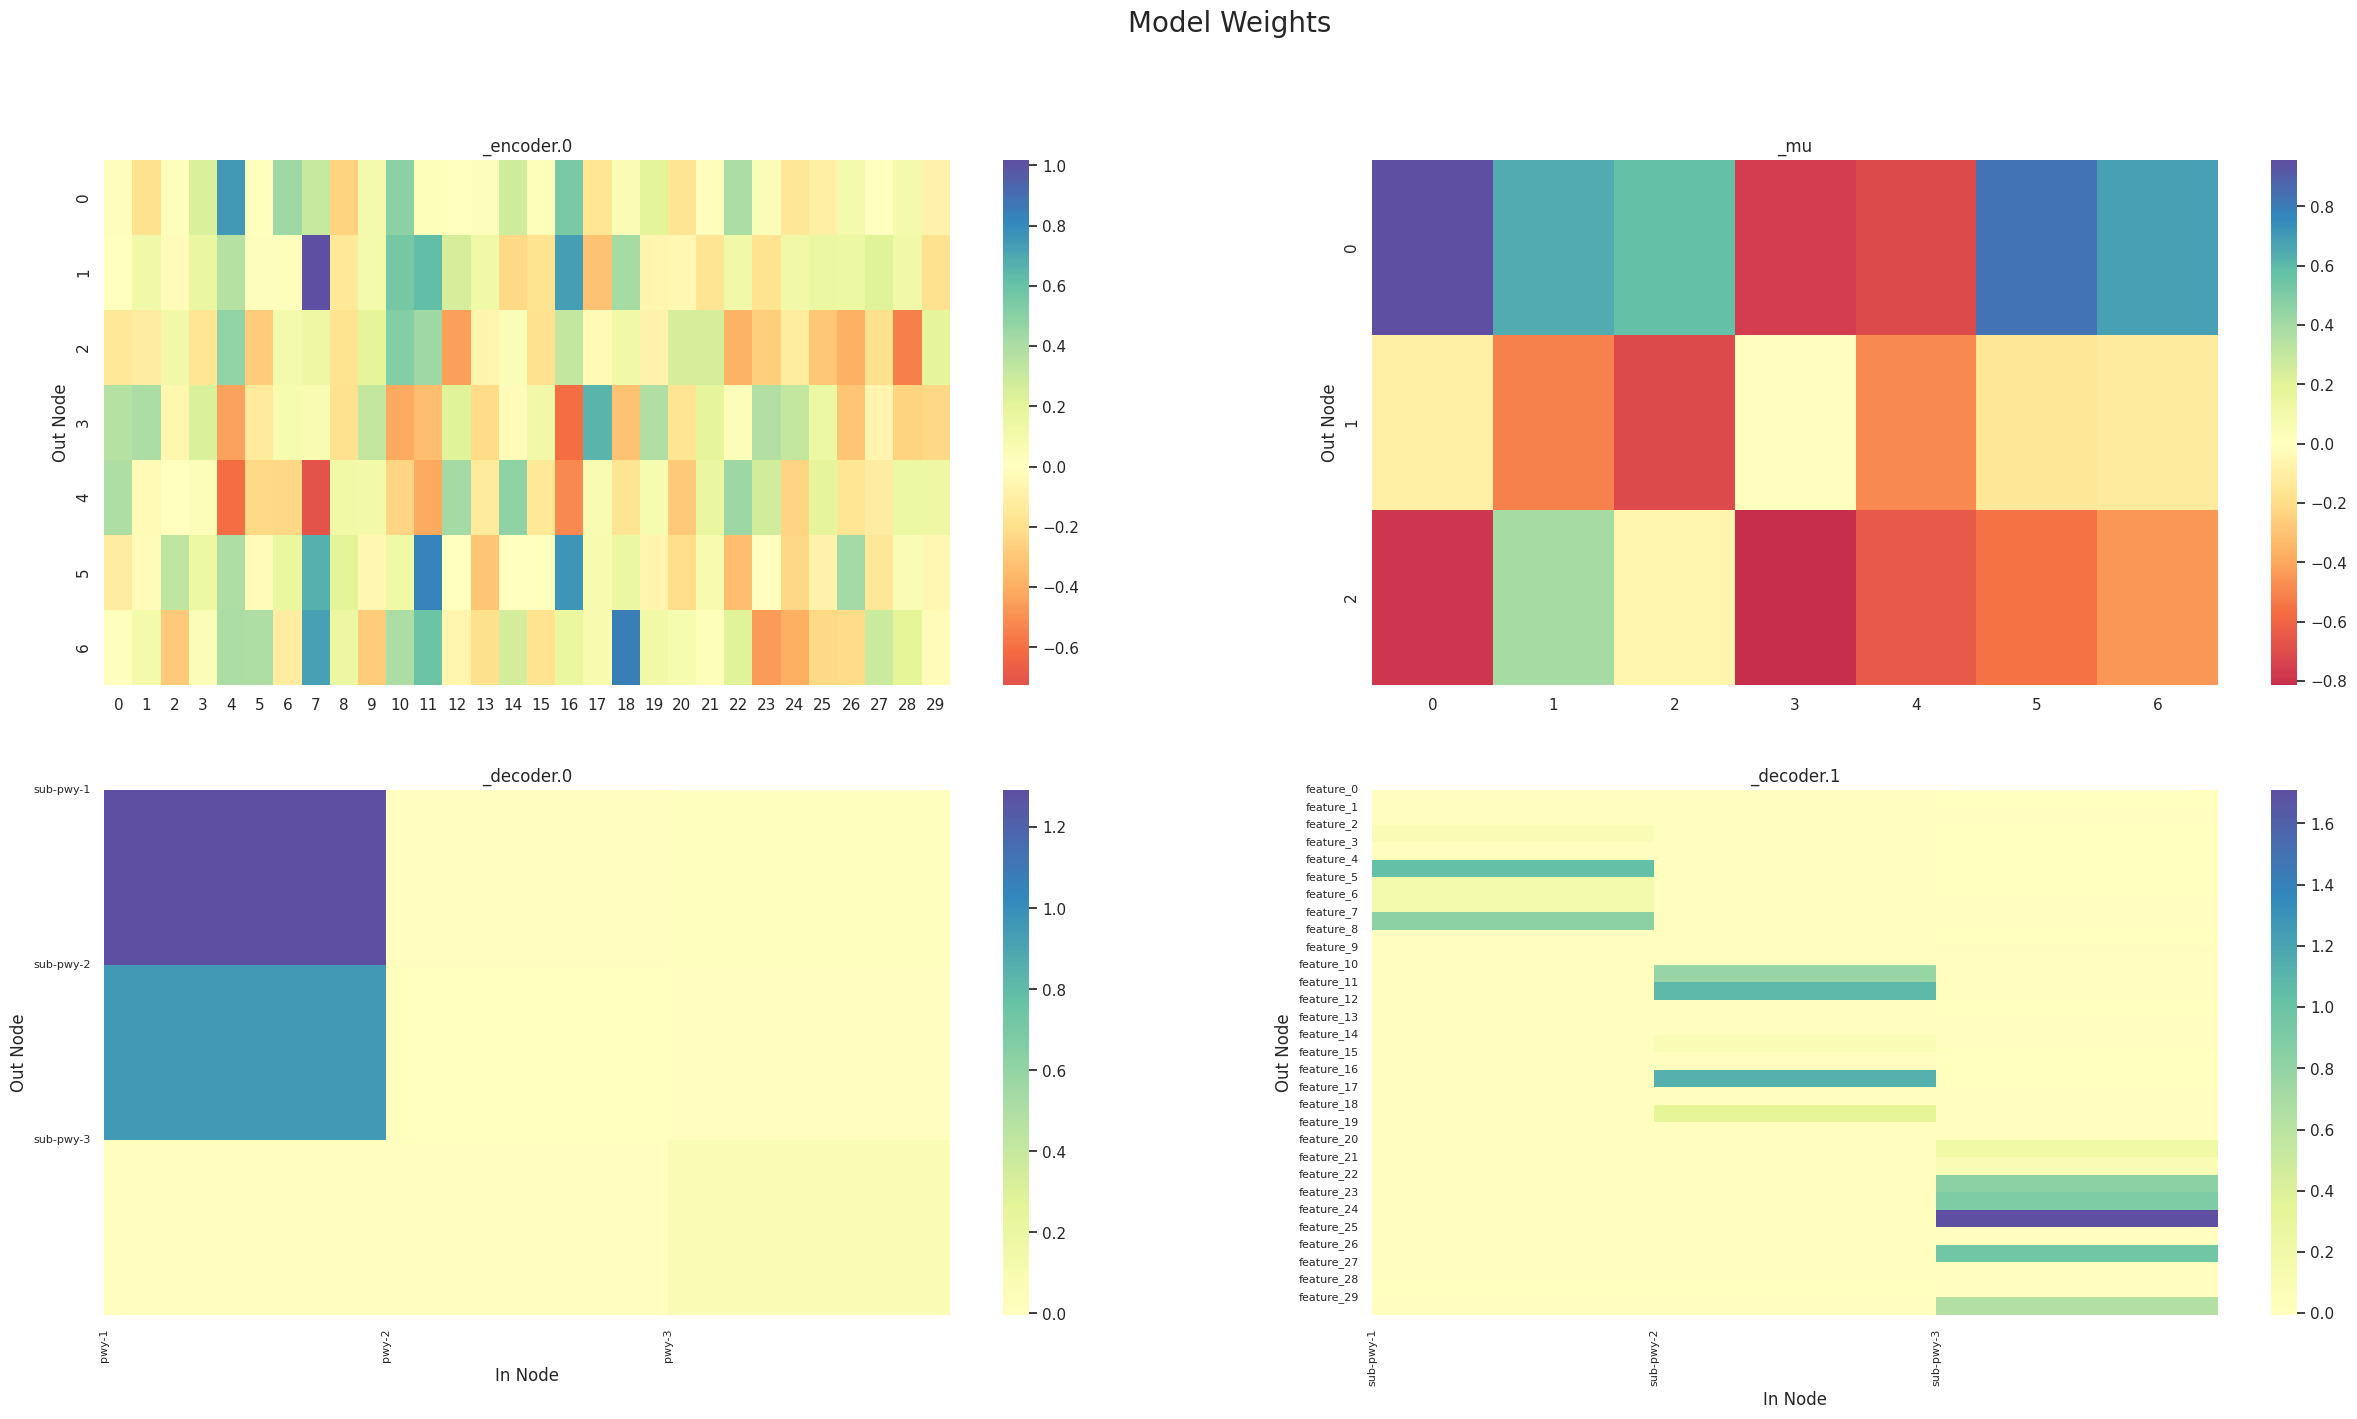

In [15]:
ontix._visualizer.show_weights()

Creating plots ...


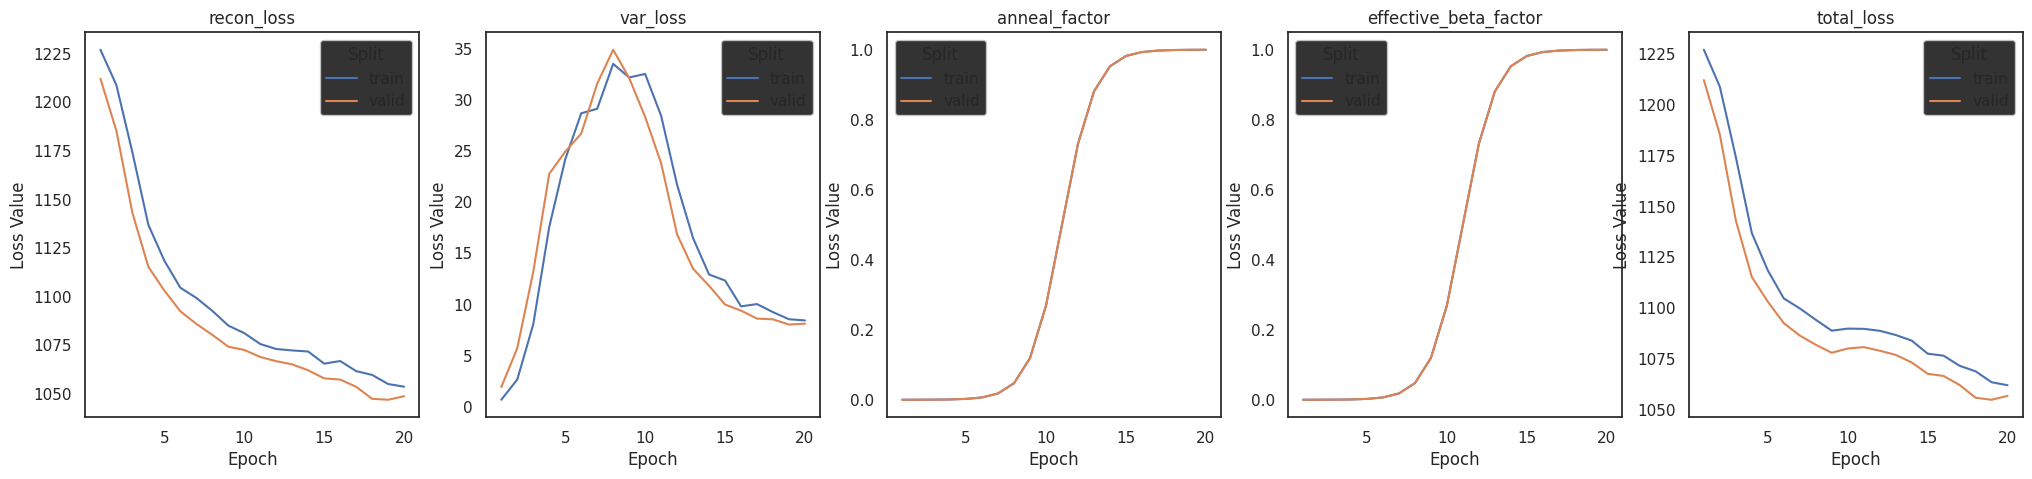

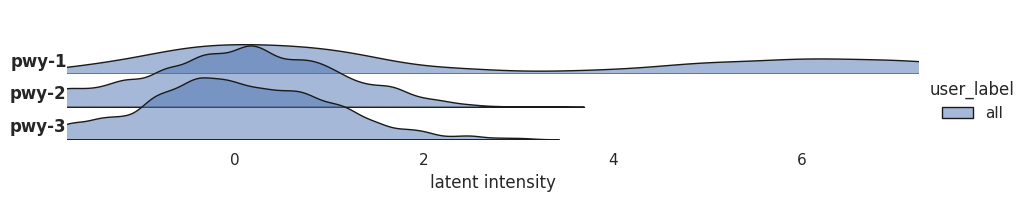

/home/ewald/Github/autoencodix_package/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


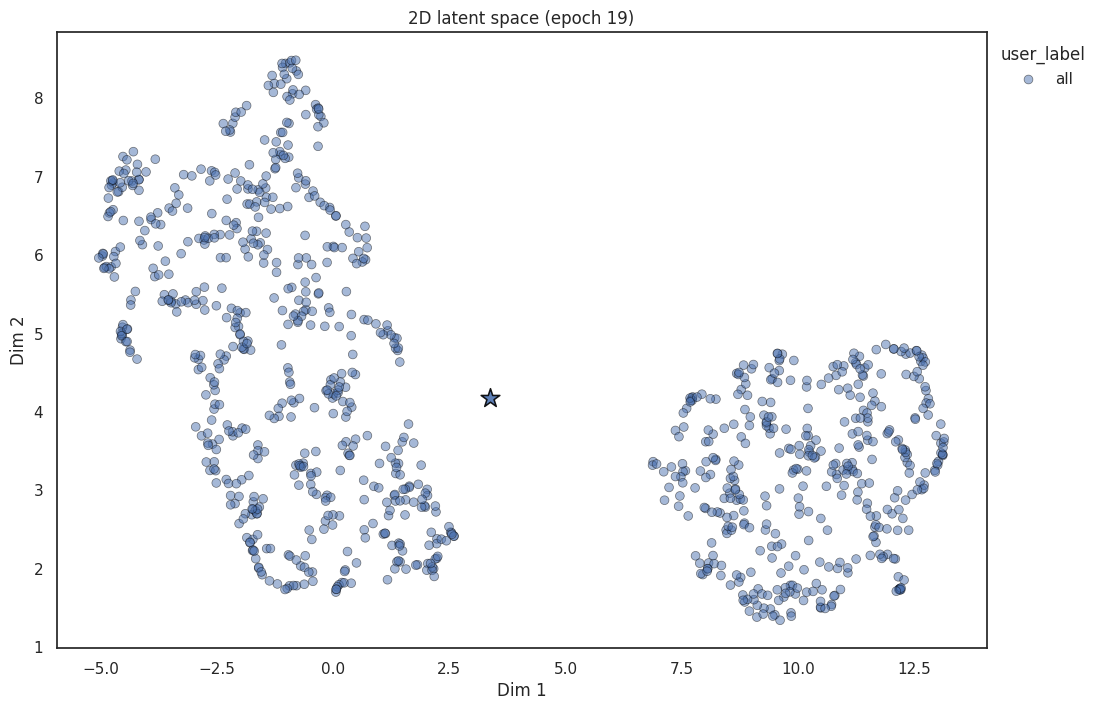

In [16]:
ontix.show_result()

/home/ewald/Github/autoencodix_package/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


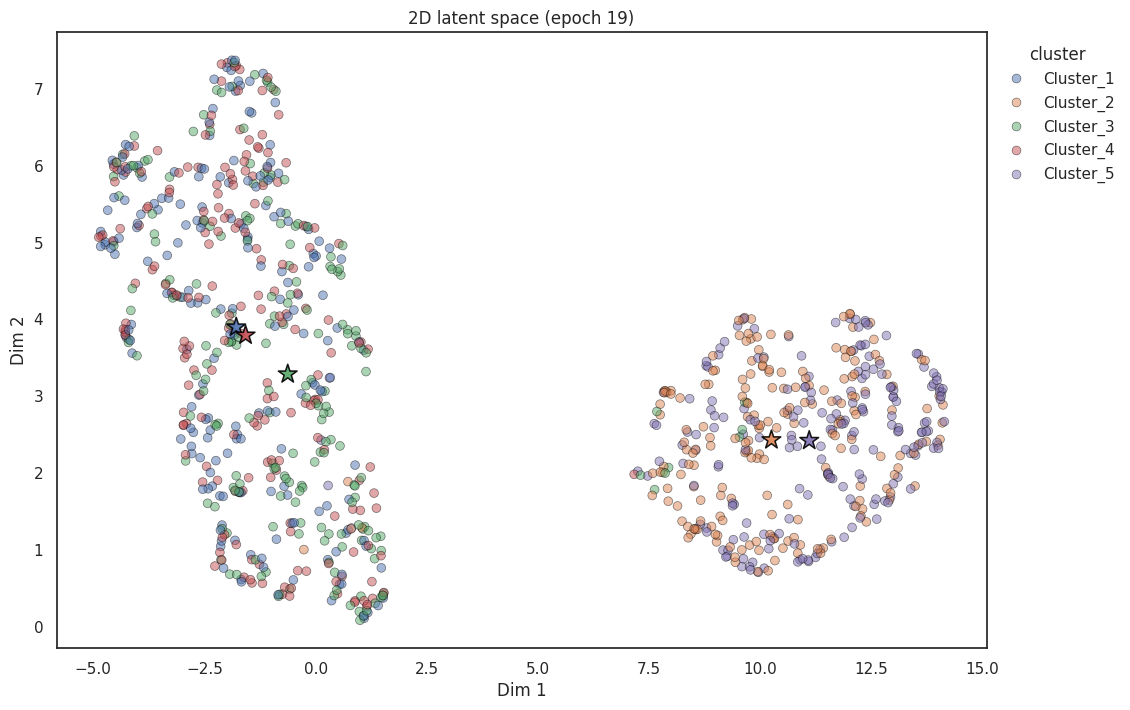

In [17]:
# categorical_clusters = ["Cluster_"+str(c) for c in EXAMPLE_PROCESSED_DATA.train.metadata.cluster]
# categorical_clusters
ontix._visualizer.show_latent_space(result=ontix.result,plot_type="2D-scatter", split="all", param=["cluster"])

In [18]:
ontix.ontologies

({'pwy-1': ['sub-pwy-1', 'sub-pwy-2'],
  'pwy-2': ['sub-pwy-2'],
  'pwy-3': ['sub-pwy-1', 'sub-pwy-3']},
 {'sub-pwy-1': ['feature_0',
   'feature_1',
   'feature_2',
   'feature_3',
   'feature_4',
   'feature_5',
   'feature_6',
   'feature_7',
   'feature_8',
   'feature_9'],
  'sub-pwy-2': ['feature_10',
   'feature_11',
   'feature_12',
   'feature_13',
   'feature_14',
   'feature_15',
   'feature_16',
   'feature_17',
   'feature_18',
   'feature_19'],
  'sub-pwy-3': ['feature_20',
   'feature_21',
   'feature_22',
   'feature_23',
   'feature_24',
   'feature_25',
   'feature_26',
   'feature_27',
   'feature_28',
   'feature_29']})

In [19]:
enumerate(ontix.result.model.ontologies)

In [20]:
ontix.result.model.ontologies[1].keys()

dict_keys(['sub-pwy-1', 'sub-pwy-2', 'sub-pwy-3'])

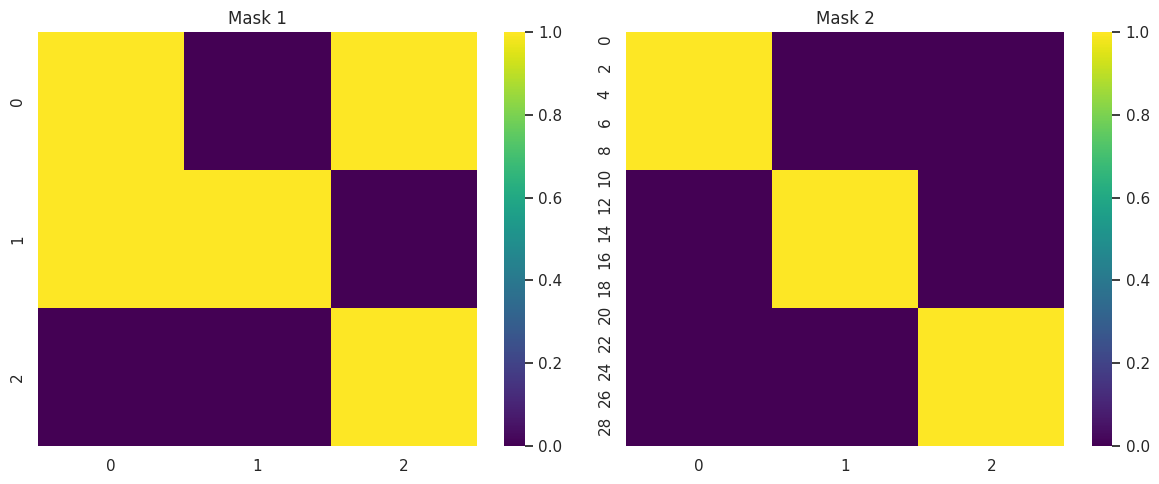

In [21]:
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt

masks = ontix.result.model.masks

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
for i, mask in enumerate(masks):
	sns.heatmap(np.array(mask), ax=axes[i], cmap="viridis")
	axes[i].set_title(f"Mask {i+1}")
plt.tight_layout()
plt.show()